- 타이타닉 생존자 예측하라!

# 전처리
- 결측치
    - 나이 : 평균값
    - 선실번호(cabin) : N
    - 중간정착항구(embarked) : N
- 레이블 인코딩
- 피처 제거 : PassengerId, Name, Ticket

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# 파일 불러오기
titanic_df = pd.read_csv('titanic.csv')
titanic_df[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치 처리

In [3]:
titanic_df['Age'].fillna(titanic_df.Age.mean(), inplace=True)

In [4]:
titanic_df['Cabin'].fillna('N', inplace=True)

In [5]:
titanic_df['Embarked'].fillna('N', inplace=True)

In [6]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
titanic_df.Cabin.str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [8]:
titanic_df.Cabin.str[:1].value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [9]:
titanic_df.Cabin = titanic_df.Cabin.str[:1]
titanic_df.Cabin

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

## 레이블 인코딩

In [10]:
# Object 컬럼 확인
titanic_df.dtypes[titanic_df.dtypes =='object'].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [11]:
from sklearn.preprocessing import LabelEncoder

def encode_feature(df):
    feature = ['Sex', 'Cabin', 'Embarked']
    encoder = LabelEncoder()
    
    for f in feature:
        encoder.fit(df[f])
        df[f] = encoder.transform(df[f])
    return df

titanic_df = encode_feature(titanic_df)
titanic_df[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0


In [12]:
titanic_df.Cabin.value_counts().sort_index()

Cabin
0     15
1     47
2     59
3     33
4     32
5     13
6      4
7    687
8      1
Name: count, dtype: int64

In [13]:
# 피처 제거
titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
titanic_df[:2]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0


# 학습 데이터, 테스트 데이터 셋 분리

In [14]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=11)

In [16]:
x_train.shape

(712, 8)

In [17]:
x_test.shape

(179, 8)

In [18]:
y_train.shape

(712,)

In [19]:
y_test.shape

(179,)

# DecisionTreeClassifier : 학습/예측/평가

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)

dt_clf.fit(x_train, y_train)

pred = dt_clf.predict(x_test)

accuracy_score(y_test, pred)

0.7877094972067039

In [21]:
# feature importance
dt_clf.feature_importances_

array([0.0826082 , 0.28371894, 0.24767893, 0.04561896, 0.01963887,
       0.22423181, 0.05628073, 0.04022358])

In [22]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [23]:
for col, val in zip(X.columns, dt_clf.feature_importances_):
    print(f'{col} : {val}')

Pclass : 0.08260820037500148
Sex : 0.2837189364182245
Age : 0.24767892651898044
SibSp : 0.04561895611637998
Parch : 0.019638870267613618
Fare : 0.2242318050646934
Cabin : 0.05628072854745321
Embarked : 0.04022357669165342


<Axes: >

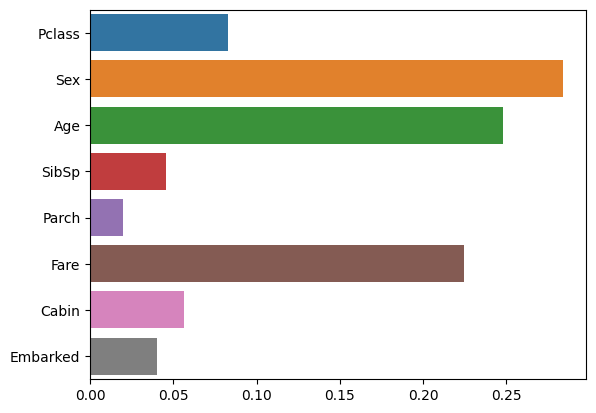

In [25]:
sns.barplot(x=dt_clf.feature_importances_, y=X.columns)

# KFold : fold set - 5

In [26]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. 결정트리 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 2. KFold 객체 생성
kfold = KFold(n_splits=5)

# 정확도 저장할 리스트
accuracy = []

# KFold 교차 검증 수행
for idx, (train_index, test_index) in enumerate(kfold.split(X), 1):
    # 3. 학습용, 검증용 데이터 추출
    x_train, x_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # 4. 학습
    dt_clf.fit(x_train, y_train)
    
    # 5. 예측
    pred = dt_clf.predict(x_test)

    # 6. 정확도
    acc = accuracy_score(y_test, pred)
    accuracy.append(acc)
    
    # 출력
    print(f'교차 검증 : {idx}차,  정확도 : {acc}')

# 정확도 평균
mean_accuracy = np.mean(accuracy)
print(f'평균 정확도 : {mean_accuracy}')

교차 검증 : 1차,  정확도 : 0.7541899441340782
교차 검증 : 2차,  정확도 : 0.7808988764044944
교차 검증 : 3차,  정확도 : 0.7865168539325843
교차 검증 : 4차,  정확도 : 0.7696629213483146
교차 검증 : 5차,  정확도 : 0.8202247191011236
평균 정확도 : 0.782298662984119


<Axes: >

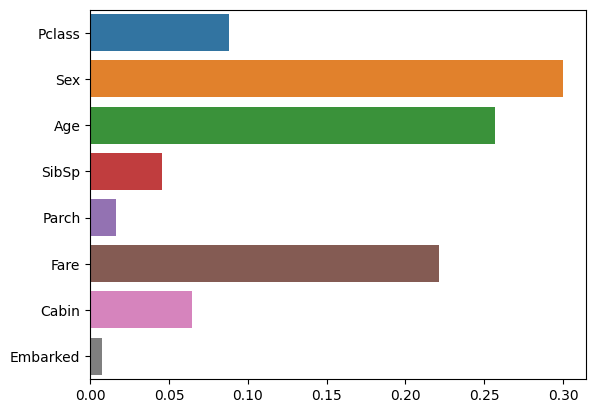

In [27]:
# 피처 시각화
sns.barplot(x=dt_clf.feature_importances_, y=X.columns)

# Stratified KFold : fold set - 5

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. 결정트리 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 2. StratifiedKFold 객체 생성
skf = StratifiedKFold(n_splits=5)

# 정확도 저장할 리스트
s_accuracy = []

# StratifiedKFold 교차 검증 수행
for idx, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # 3. 학습용, 검증용 데이터 추출
    x_train, x_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    # 4. 학습
    dt_clf.fit(x_train, y_train)
    
    # 5. 예측
    pred = dt_clf.predict(x_test)
    
    # 6. 정확도
    acc = accuracy_score(y_test, pred)
    s_accuracy.append(acc)
    
    # 출력
    print(f'교차 검증 : {idx}차,  정확도 : {acc}')
    
# 정확도 평균    
np.mean(s_accuracy)

교차 검증 : 1차,  정확도 : 0.7430167597765364
교차 검증 : 2차,  정확도 : 0.7752808988764045
교차 검증 : 3차,  정확도 : 0.7921348314606742
교차 검증 : 4차,  정확도 : 0.7865168539325843
교차 검증 : 5차,  정확도 : 0.8426966292134831


0.7879291946519366

# cross_val_score : cv - 5

In [31]:
# StratifiedKFold 방식
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 1. 결정 트리 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 2. 학습 / 예측 / 평가 
cv_accuracy = cross_val_score(dt_clf, X, y, scoring='accuracy', cv=5)

In [32]:
for idx, accuracy in enumerate(cv_accuracy, 1):
    print(f'교차 검증 : {idx}차, 정확도 : {accuracy}')

교차 검증 : 1차, 정확도 : 0.7430167597765364
교차 검증 : 2차, 정확도 : 0.7752808988764045
교차 검증 : 3차, 정확도 : 0.7921348314606742
교차 검증 : 4차, 정확도 : 0.7865168539325843
교차 검증 : 5차, 정확도 : 0.8426966292134831


In [33]:
np.mean(cv_accuracy)

0.7879291946519366

# GridSearchCV : cv - 5
- max_depth : [2, 3, 5, 10]
- min_samples_split : [2, 3, 5]
- min_samples_leaf : [1, 5, 8]

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. 결정 트리 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 2-1. 파라미터 설정 
parameter = {'max_depth' : [2, 3, 5, 10], 'min_samples_split' : [2, 3, 5], 'min_samples_leaf' : [1, 5, 8]}

# 2-2. GridSearchCV 객체 생성
grid_search = GridSearchCV(dt_clf, param_grid=parameter, cv=5, return_train_score=True)

# 3. 학습 / 검증 / 평가 
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             return_train_score=True)

In [35]:
grid_search.cv_results_

{'mean_fit_time': array([0.0010695 , 0.00060143, 0.00060563, 0.00080137, 0.00060019,
        0.00040007, 0.00060005, 0.00080023, 0.00060015, 0.00080018,
        0.00060019, 0.00040073, 0.00060005, 0.00060005, 0.00080028,
        0.00080013, 0.00080018, 0.00060015, 0.00100017, 0.00100021,
        0.00060015, 0.00100031, 0.00100026, 0.00080018, 0.00080023,
        0.00060019, 0.00080023, 0.00100026, 0.00100021, 0.00080023,
        0.00100017, 0.00100021, 0.00100021, 0.00080018, 0.00100007,
        0.00080013]),
 'std_fit_time': array([1.38904506e-04, 4.91071983e-04, 4.94564697e-04, 4.00687129e-04,
        4.90057117e-04, 4.89979242e-04, 4.89940316e-04, 4.00114102e-04,
        4.90018206e-04, 4.00090228e-04, 4.90057117e-04, 4.90797681e-04,
        4.89940316e-04, 4.89940316e-04, 4.00137912e-04, 4.00066404e-04,
        4.00090257e-04, 4.90018206e-04, 1.50789149e-07, 1.78416128e-07,
        4.90018183e-04, 2.43140197e-07, 1.16800773e-07, 4.00090228e-04,
        4.00114102e-04, 4.90057140e-0

In [36]:
grid_search_df = pd.DataFrame(grid_search.cv_results_)
grid_search_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001069,1.389045e-04,0.000000,0.000000,2,1,2,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.748252,0.769231,...,0.775564,0.029252,28,0.791228,0.791228,0.775439,0.791594,0.796848,0.789267,0.007236
1,0.000601,4.910720e-04,0.000400,0.000490,2,1,3,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.748252,0.769231,...,0.775564,0.029252,28,0.791228,0.791228,0.775439,0.791594,0.796848,0.789267,0.007236
2,0.000606,4.945647e-04,0.000000,0.000000,2,1,5,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.748252,0.769231,...,0.775564,0.029252,28,0.791228,0.791228,0.775439,0.791594,0.796848,0.789267,0.007236
3,0.000801,4.006871e-04,0.000201,0.000402,2,5,2,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.748252,0.769231,...,0.775564,0.029252,28,0.791228,0.791228,0.775439,0.791594,0.796848,0.789267,0.007236
4,0.000600,4.900571e-04,0.000200,0.000400,2,5,3,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.748252,0.769231,...,0.775564,0.029252,28,0.791228,0.791228,0.775439,0.791594,0.796848,0.789267,0.007236
5,0.000400,4.899792e-04,0.000200,0.000400,2,5,5,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.748252,0.769231,...,0.775564,0.029252,28,0.791228,0.791228,0.775439,0.791594,0.796848,0.789267,0.007236
6,0.000600,4.899403e-04,0.000200,0.000400,2,8,2,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.748252,0.769231,...,0.775564,0.029252,28,0.791228,0.791228,0.775439,0.791594,0.796848,0.789267,0.007236
7,0.000800,4.001141e-04,0.000200,0.000400,2,8,3,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.748252,0.769231,...,0.775564,0.029252,28,0.791228,0.791228,0.775439,0.791594,0.796848,0.789267,0.007236
8,0.000600,4.900182e-04,0.000400,0.000490,2,8,5,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.748252,0.769231,...,0.775564,0.029252,28,0.791228,0.791228,0.775439,0.791594,0.796848,0.789267,0.007236
9,0.000800,4.000902e-04,0.000200,0.000400,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.797203,0.783217,...,0.795213,0.013104,17,0.817544,0.817544,0.807018,0.821366,0.838879,0.820470,0.010371


In [37]:
# 최적의 하이퍼파라미터
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [38]:
# 최고 정확도
grid_search.best_score_

0.8050428444794642

In [41]:
# 최적 하이퍼파라미터로 학습된 Estimator
# 예측 
pred_ = grid_search.best_estimator_.predict(x_test)

In [42]:
# 평가
acc_ = accuracy_score(y_test, pred_)
acc_

0.8426966292134831